In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load previous model and datasets

from sklearn.externals import joblib

rf = joblib.load('model.pkl')

#train = pd.read_csv('finished_processed.csv')
#train.drop(['backers_count', 'usd_pledged', 'country', 'currency'], axis=1, inplace=True)
#train_target = train['state']
#train_features = train.drop(['state'], axis=1)
#print(train_features.shape, train_target.shape)


In [5]:
# fit model with all training data
#rf.fit(train_features, train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [4]:
# load test set and make it similar to our data
"""
test = pd.read_csv('unfinished_processed.csv')
test_unprocessed = pd.read_csv('unfinished.csv')
test['urls'] = test_unprocessed['urls']
test.drop(['backers_count', 'usd_pledged', 'country', 'currency'], axis=1, inplace=True)
"""
test = pd.read_csv('unfinished_processed_for_testing.csv')

In [51]:
# scape kickstarter for current status
"""
import requests
import ast

def get_state(cell):
    url = ast.literal_eval(cell)['project']
    response = requests.get(url)
    # status is found after data-project-state in form of 'data-project-state': "successful"
    index = response.text.find('data-project-state')
    state = response.text[index:index+30]
    state_splitted = state.split('"')
    print(state_splitted)
    try:
        status = state_splitted[1]
    except IndexError:
        status = 'unknown'
    return status

test['state'] = test.apply(lambda row: get_state(row['urls']), axis = 1)
"""
print('Not going to run again')

Not going to run again


In [7]:
# check value counts
#print(test.state.value_counts())

0    2105
1    1575
Name: state, dtype: int64


In [19]:
"""
test = test[test.state != 'canceled']
print(test.state.value_counts())
test = test[test.state != 'suspended']
print(test.state.value_counts())
test = test[test.state != 'unknown']
print(test.state.value_counts())
"""

failed        2105
successful    1575
suspended        7
unknown          5
Name: state, dtype: int64
failed        2105
successful    1575
unknown          5
Name: state, dtype: int64
failed        2105
successful    1575
Name: state, dtype: int64


In [20]:
"""
test['state'][test.state != 'successful'] = 0
test['state'][test.state == 'successful'] = 1
"""

C:\Users\Janne\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
#print(test.state.value_counts())
#test.to_csv('unfinished_processed_for_testing.csv', index = False)

0    2105
1    1575
Name: state, dtype: int64


In [5]:
test_target = test['state']
test_features = test.drop(['state', 'urls'], axis=1)

In [6]:
print(test_target.shape)
print(test_target.value_counts(normalize=True))
print(test_features.shape)
print(test_features.keys())

(3680,)
0    0.572011
1    0.427989
Name: state, dtype: float64
(3680, 7)
Index(['category', 'creator', 'goal', 'staff_pick', 'location', 'blurb_length',
       'duration'],
      dtype='object')


In [7]:
predicted = rf.predict(test_features)
test_target = test_target.astype(np.int64)
print(accuracy_score(test_target, predicted))
print(1 - rf.oob_score_)
importances = [(test_features.keys()[i], rf.feature_importances_[i]) for i in range(len(test_features.keys()))]
print(importances)

0.632336956522
0.205128984969
[('category', 0.47896727528134753), ('creator', 0.071693497850272875), ('goal', 0.18659576114411539), ('staff_pick', 0.099265255585958501), ('location', 0.072017254260547892), ('blurb_length', 0.040965504275799001), ('duration', 0.050495451601958861)]


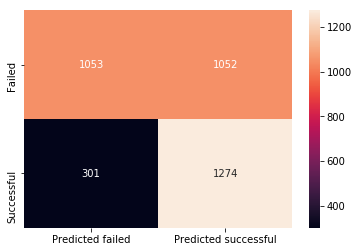

In [8]:
cfmtx = confusion_matrix(test_target, predicted)
sns.heatmap(cfmtx, annot=True, fmt='g', yticklabels=['Failed', 'Successful'], 
            xticklabels=['Predicted failed', 'Predicted successful'])